# Sheet 7

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import scipy

# 1) Log-sum-exp and softmax

(a)

In [14]:
s1 = np.array([1,2,3])
s2 = np.array([11,12,13])
s3 = np.array([10,20,30])

print(scipy.special.softmax(s1))
print(scipy.special.softmax(s2))
print(scipy.special.softmax(s3))

[0.09003057 0.24472847 0.66524096]
[0.09003057 0.24472847 0.66524096]
[2.06106005e-09 4.53978686e-05 9.99954600e-01]


(i) constant offset <br>
$$ \begin{align*} 
\text{softmax}(\sigma, \lambda)_k &= \frac{exp(\lambda \sigma_k)}{\sum_{j=0}^K exp(\lambda \sigma_j)} \\
\text{softmax}(\sigma + c, \lambda)_k &= \frac{exp(\lambda \sigma_k +c)}{\sum_{j=0}^K exp(\lambda \sigma_j+c)} \\
&= \frac{exp(\lambda \sigma_k) exp(c)}{\sum_{j=0}^K exp(\lambda \sigma_j) exp(c)} \\
&= \frac{exp(c) exp(\lambda \sigma_k)}{exp(c) \big( \sum_{j=0}^K exp(\lambda \sigma_j) \big)} \\
&= \frac{exp(\lambda \sigma_k)}{\sum_{j=0}^K exp(\lambda \sigma_j)} \\
&= \text{softmax}(\sigma, \lambda)_k
\end{align*} $$

(ii) rescaling <br>
As seen in the calculations above, the softmax is not invariant for rescaling.

(b)

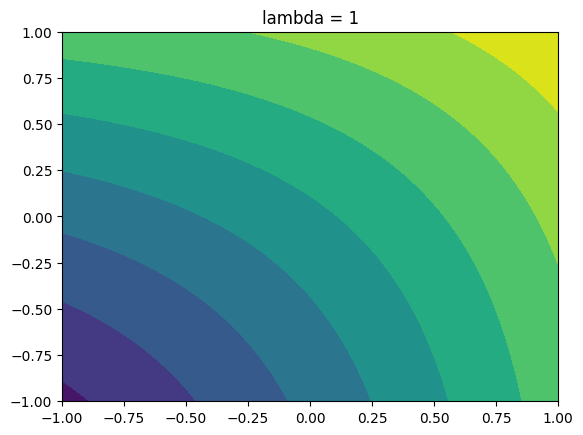

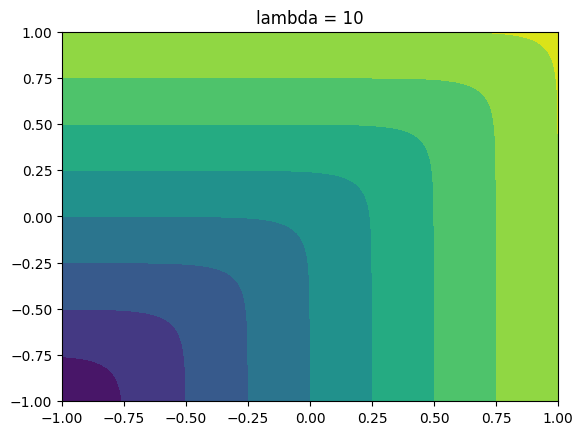

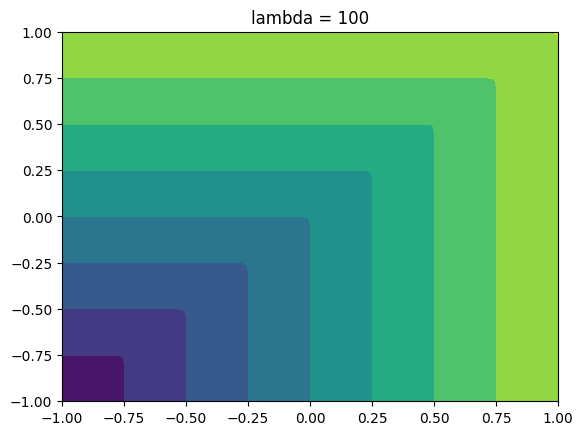

In [91]:
def logsumexp(x, lamb=1):
    # TODO: implement the logsumexp
    out = np.zeros(x[1].shape)
    for i in range(len(out[0])):
        for j in range(len(out[1])):
            out[i][j] = np.exp(lamb * x[0][i][j]) + np.exp(lamb * x[1][i][j])

    return 1/lamb * np.log(out)

# TODO: set up a grid of points in [-1, 1] x [-1, 1]
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
    
# TODO: calculate and plot the functions as specified in the task
plt.contourf(X,Y, logsumexp(np.array([X,Y]), 1))
plt.title("lambda = 1")
plt.show()

plt.contourf(X,Y, logsumexp(np.array([X,Y]), 10))
plt.title("lambda = 10")
plt.show()

plt.contourf(X,Y, logsumexp(np.array([X,Y]), 100))
plt.title("lambda = 100")
plt.show()

(c)

In [ ]:
def softmax(x, axis, lamb=1):
    # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.

        
# TODO: compute the argmax of each gridpoint in one-hot form
onehot_argmax = to_onehot(np.argmax(xy, axis=-1))

# TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)

# plot the softmax
fig, axs = plt.subplots(2, 4, figsize=(17, 7))
        
# plot the onehot argmax


# 2) Top tagging with Point Clouds

See https://github.com/heidelberg-hepml/ml-tutorials for solutions

# 3) CNNs for Galaxy Classification

In [ ]:
import h5py
import numpy as np
import torch

label_names = [
    'Disk, Face-on, No Spiral',
    'Smooth, Completely round',
    'Smooth, in-between round',
    'Smooth, Cigar shaped',
    'Disk, Edge-on, Rounded Bulge',
    'Disk, Edge-on, Boxy Bulge',
    'Disk, Edge-on, No Bulge',
    'Disk, Face-on, Tight Spiral',
    'Disk, Face-on, Medium Spiral',
    'Disk, Face-on, Loose Spiral'
]
n_classes = len(label_names)

# To get the images and labels from file
with h5py.File('data07/Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
images = images.astype(np.float32)

# comply to (batch, channel, height, width) convention of pytorch
images = np.moveaxis(images, -1, 1)  
# convert to torch
images = torch.from_numpy(images)
labels = torch.from_numpy(labels)

print(f'{images.shape=}, {labels.shape=}')

print(labels.shape, images.shape)
# TODO: print the number of samples for each class

In [ ]:
from matplotlib import pyplot as plt

# TODO: plot some samples of each class
itemindex = torch.where(labels == 3)
itemindex[:3]

samples_per_class = 3
fig, axss = plt.subplots(samples_per_class, n_classes, figsize=(n_classes * 2, samples_per_class * 2))
for label, (label_name, axs) in enumerate(zip(label_names, axss.T)):
    idx = torch.where(labels==label)[0][:samples_per_class] # take samples_per_class first occurences
    for i, (ind, ax) in enumerate(zip(idx, axs)):
        ax.imshow(images[ind].long().moveaxis(0, -1))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title(label_name.replace(',',',\n'))
plt.tight_layout()
plt.show()

In [ ]:
from torchvision.transforms import Normalize

# TODO: Compute the mean and standard deviation per channel over the dataset

# stds = images.moveaxis(1, 0).reshape(3, -1).std(axis=1)
# means = images.moveaxis(1, 0).reshape(3, -1).mean(axis=1)
stds, means = torch.tensor([37.5412, 31.3756, 26.3283]), torch.tensor([27.7014, 23.8241, 18.1425])
print(stds, means)

# TODO: Normalize the images
normalize = Normalize(means, stds)
images_normalized = normalize(images)

In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

n_samples = len(labels)

# TODO: split the data in training and validation sets, stratifying by the labels
train_idx, val_idx = train_test_split(np.arange(n_samples), test_size=0.1, stratify=labels)

# TODO: create pytorch datasets for training and validation
train_dataset = TensorDataset(images_normalized[train_idx].float(), labels[train_idx].long())
val_dataset = TensorDataset(images_normalized[val_idx].float(), labels[val_idx].long())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#TODO: implement a small CNN as specified on the sheet


(b)

In [ ]:
# TODO: create DataLoaders for train and val, use a batch size of 16

# TODO: instantiate the model, optimizer and criterion

# TODO: implement the training loop, validating after every epoch, and make the requested plots
from sklearn.metrics import confusion_matrix


(c)

In [ ]:
# TODO: redo (c) with a ResNet
# Hint: Training is probably quicker on google colab (https://colab.research.google.com/)

